In [37]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [38]:
def get_yahoo_data(ticker='XLF', start_date='2024-8-1', most_recent_friday=True, end_date='2023-12-31'):
    data_hold=yf.Ticker(ticker)
    
    if most_recent_friday:
        today = datetime.now()
        days_since_friday = (today.weekday() - 4) % 7
        last_friday = today - timedelta(days=days_since_friday)
        end_date = (last_friday.date() + timedelta(days=1)).strftime('%Y-%m-%d')
        
    price_df=data_hold.history(start=start_date,  end=end_date, interval='1h')[['Open','High','Low','Close','Volume']]
    
    price_df.name=ticker
    
    price_df['Return'] = price_df.Close.pct_change()
    price_df['Cumulative_Ret'] = (price_df['Return'] + 1).cumprod()
    
    price_df.at[price_df.index[0], 'Cumulative_Ret'] = 1
    
    return price_df

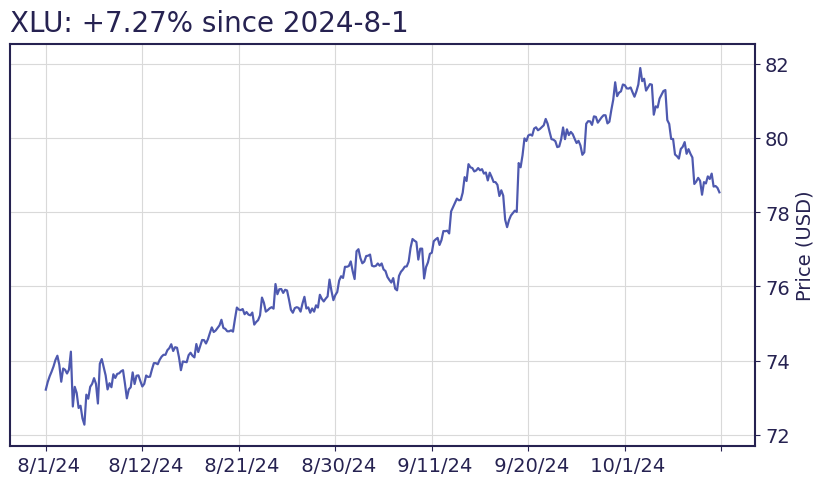

In [39]:
def graph_tick(tick, start_date='2024-8-1', most_recent_friday=True, end_date='2023-12-31', currency='USD'):
    ohlc_df = get_yahoo_data(ticker=tick, start_date='2024-8-1', most_recent_friday=True, end_date='2023-12-31')
    mc = mpf.make_marketcolors(inherit=True)
    rc_dict = {'font.size': 14.0,
               'font.weight': 'light',
               'axes.labelcolor': '262251',
               'text.color': '262251',
               'xtick.color': '262251',
               'ytick.color': '262251',
               'axes.linewidth': 1.5,
               'axes.titlelocation': 'left',
               'figure.titlesize': 20.0}
    trading_gt_theme = mpf.make_mpf_style(marketcolors=mc, facecolor='w', gridstyle='-', gridcolor='d9d9d9', 
                                          y_on_right = True, edgecolor='262251', rc = rc_dict)
    
    fig, axlist = mpf.plot(ohlc_df, type='line', style=trading_gt_theme, figratio=(9,5), datetime_format=' %#m/%#d/%y', 
                           ylabel=f'Price ({currency})', xrotation=0, linecolor='#4e59af', scale_width_adjustment=dict(lines=2), 
                           returnfig=True)
    
    cumulative_ret = ohlc_df.iloc[-1,-1] - 1
    
    fig.suptitle(f'{tick}: {'+' if cumulative_ret >= 0 else ''}{cumulative_ret:.2%} since {start_date}', ha='left', va='top', y=.94, x=0.18)
    plt.show();  # y=.94, x=0.332
    
graph_tick('XLU')